# WeRateDogs project:

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import datetime
import tweepy
import json
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling:

### 1) Data Gathering:


1.1 Source 1: upload 'twitter-archive-enhanced.csv'

In [3]:
# Read csv file
main_df= pd.read_csv('twitter-archive-enhanced.csv')
main_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


1.2 source2: Download 'image-predictions.tsv'

In [4]:
# make image prediction folder
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# get the url    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# open the file and get its content
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb' ) as file:
    file.write(response.content)

In [6]:
# check folder content
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Read image-predictions.tsv file
df_image_predictions = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


1.3 Source 3: Scrape 'retweet_count' and 'favorite_count'

In [8]:
# get access to twetter developer account
consumer_key = 'DDf30rKHtXZSMLyGhF5HHBsL9'
consumer_secret = 'ApC8eKq1OWNMqpq8EpDbqiltbBrtR7yEkhFctrH3JVEo0APPDe'
access_token = '1349768785209786375-SwKJswtZAps0T9jGXrdv8FufwAP2zY'
access_secret = 'cLOzpNxvCDFK9vinkl3cUAky5FU09pYWe5a4uS1r2uIf0'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [9]:
#experimenting extract id information
exp_tweet= api.get_status(main_df.tweet_id[1000], tweet_mood = 'extended')
content = exp_tweet._json
content

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]},
 'extended_entit

In [10]:
# get the data from tweeter and put it in tweet_json.txt file
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt','w') as file:
        for tweetid in main_df['tweet_id']:
            try:
                status = api.get_status(tweetid, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode= 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print('error on tweet id{}'.format(tweetid) + ';' + str(e))
                errors.append(tweetid)

In [11]:
# Make our DataFrame from data in tweet_json.txt file 
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet_id = json.loads(line)['id']
        retweet_count = json.loads(line)['favorite_count']
        favorite_count = json.loads(line)['retweet_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count':retweet_count,
                       'favorite_count':favorite_count})
api_df = pd.DataFrame(df_list)

In [12]:
api_df.head()

,favorite_count,retweet_count,tweet_id
0,7424,35172,892420643555336193
1,5520,30443,892177421306343426
2,3645,22894,891815181378084864
3,7596,38469,891689557279858688
4,8176,36729,891327558926688256


### 2)Data Assessment:

In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Tidness issues:
1.1 create dog_types column that include values of (doggo,floofer,pupper,puppo)

#### Quality issues:
2.1 Drop retweeted rows
2.2 Drop replies rows
2.3 clean the None values in dog types 

In [14]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Tidiness issues:
1.2 put the prediction values over each other 
1.3 Merge DataFrames

#### Quality issues:
2.4 change columns names

In [15]:
api_df.head()

,favorite_count,retweet_count,tweet_id
0,7424,35172,892420643555336193
1,5520,30443,892177421306343426
2,3645,22894,891815181378084864
3,7596,38469,891689557279858688
4,8176,36729,891327558926688256


#### Quality issues:
2.5 fix columns order

### 3)Data Cleaning

#### Define:
changing columns order for api_df DataFrame by assigning each column to its right index.

#### Code:

In [16]:
titles = list(api_df.columns)
titles

['favorite_count', 'retweet_count', 'tweet_id']

#### Test:

In [17]:
# changing columns order for api_df DataFrame
titles[0],titles[2] = titles[2],titles[0]
api_df = api_df[titles]
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,35172,7424
1,892177421306343426,30443,5520
2,891815181378084864,22894,3645
3,891689557279858688,38469,7596
4,891327558926688256,36729,8176


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Make a copy of original DataFrames for cleaning
archive_clean = main_df.copy()
predictions_clean = df_image_predictions.copy()
api_clean = api_df.copy()

#### define:
Drop retweeted rows from archive_clean DataFrame by making them Boolean then, deleting the True value using(~)

#### Code:

In [21]:
# Drop retweeted rows from archive_clean DataFrame
retweet_clean = archive_clean.retweeted_status_id.notnull()
archive_clean = archive_clean[~retweet_clean]

#### Test:

In [22]:
# Test: check if retweet rows is still exists
retweet_clean = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_clean].shape[0]

0

#### Define:
Drop replies rows from archive_clean DataFrame by making them Boolean then, deleting the True value using(~)

#### Code:

In [23]:
# Drop replies rows from archive_clean DataFrame
reply_clean = archive_clean.in_reply_to_status_id.notnull()
archive_clean = archive_clean[~reply_clean]

#### Test:

In [24]:
archive_clean[reply_clean].shape[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define:
clean the None values in dog types columns by using .replace("None","")

#### Code:

In [26]:
# clean the None values in dog types columns
archive_clean.doggo = archive_clean.doggo.replace("None","")
archive_clean.floofer = archive_clean.floofer.replace("None","")
archive_clean.pupper = archive_clean.pupper.replace("None","")
archive_clean.puppo = archive_clean.puppo.replace("None","")

#### Test:

In [27]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


#### Define:
create dog_types column that include values of (doggo,floofer,pupper,puppo) columns using (+) and assign them to the new column.

#### Code:

In [28]:
# create dog_types column that include values of (doggo,floofer,pupper,puppo) columns
archive_clean['dog_types'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

#### Test:

In [29]:
archive_clean.dog_types.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_types, dtype: int64

In [30]:
# check whether all values added to dog_types column
archive_clean.doggo.value_counts()

         2014
doggo      83
Name: doggo, dtype: int64

In [31]:
# check whether all values added to dog_types column
archive_clean.floofer.value_counts()

           2087
floofer      10
Name: floofer, dtype: int64

In [32]:
# check whether all values added to dog_types column
archive_clean.pupper.value_counts()

          1867
pupper     230
Name: pupper, dtype: int64

In [33]:
# check whether all values added to dog_types column
archive_clean.puppo.value_counts()

         2073
puppo      24
Name: puppo, dtype: int64

#### quality issues:
2.6 fix dog types names 

#### Define:
fix dog types names after collect them in one column using .replace(,)

#### Code:

In [34]:
# fix dog types names after collect them in one column 
archive_clean.dog_types = archive_clean.dog_types.replace('doggopupper', 'doggo & pupper')
archive_clean.dog_types = archive_clean.dog_types.replace('doggopuppo', 'doggo & puppo')
archive_clean.dog_types = archive_clean.dog_types.replace('doggofloofer', 'doggo & floofer')

#### Test:

In [35]:
# test the fix of dog types
archive_clean.dog_types.value_counts()

                   1761
pupper              221
doggo                72
puppo                23
floofer               9
doggo & pupper        9
doggo & puppo         1
doggo & floofer       1
Name: dog_types, dtype: int64

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dog_types                     2097 non-n

#### Quality issues:
2.7 Drop empty or useless columns

#### Define:
Drop empty or useless columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo) by using .drop()

#### Code:

In [37]:
# code: Drop empty or useless columns
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test:

In [38]:
# Test: Chech whether the columns are dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_types             2097 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [39]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define:
change predictions_clean Dataframe columns names to more descriptive names by using .rename.

#### Code:

In [40]:
# change predictions_clean Dataframe columns names to more descriptive names
predictions_clean.rename({'p1':'prediction_1',
                         'p1_conf':'confident_1',
                         'p1_dog':'dog_breed_1',
                         'p2':'prediction_2',
                         'p2_conf':'confident_2',
                         'p2_dog':'dog_breed_2',
                         'p3':'prediction_3',
                         'p3_conf':'confident_3',
                         'p3_dog':'dog_breed_3'}, axis=1, inplace=True)

#### Test:

In [41]:
# check whether columns names in predictions_clean Dataframe are changed
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confident_1,dog_breed_1,prediction_2,confident_2,dog_breed_2,prediction_3,confident_3,dog_breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define:
put the values over each other in predictions_clean using wide_to_long.

#### Code:

In [42]:
# put the values over each other in predictions_clean using wide_to_long
predictions_clean = pd.wide_to_long(predictions_clean, stubnames= ['prediction','confident','dog_breed'], i=['tweet_id','jpg_url','img_num'], j='dog_prediction', sep='_').reset_index()

#### Test:

predictions_clean.info()

#### Define:
Merge archive_clean DataFrame and api_clean DataFrame in one DataFrame by using .merge()

#### Code:

In [43]:
# Merge archive_clean DataFrame and api_clean DataFrame in one DataFrame
archive_clean = pd.merge(archive_clean, api_clean, on='tweet_id', how='left')

#### Test:

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,35172.0,7424.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,30443.0,5520.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,22894.0,3645.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,38469.0,7596.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,36729.0,8176.0


#### Define:
Merge archive_clean DataFrame and predictions_clean DataFrame in one DataFrame by using .merge()

#### Code:

In [45]:
# Merge archive_clean DataFrame and predictions_clean DataFrame in one DataFrame
archive_clean = pd.merge(archive_clean, predictions_clean, on='tweet_id', how='left')

#### Test:

In [46]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count,jpg_url,img_num,dog_prediction,prediction,confident,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,35172.0,7424.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,1.0,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,35172.0,7424.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,2.0,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,35172.0,7424.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,3.0,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,30443.0,5520.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1.0,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,30443.0,5520.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,2.0,Pekinese,0.090647,True


In [47]:
# Check number of rows that do not have images
sum(archive_clean.jpg_url.isnull())


126

#### Quality issues:
2.8 Drop rows that do not have images

#### Define:
Drop rows that do not have images by making them Boolean then, deleting the True value using(~)

#### Code:

In [48]:
# Drop rows that do not have images 
image_null = archive_clean.jpg_url.isnull()
archive_clean = archive_clean[~image_null]

#### Test:

In [49]:
# TEST: whether rows with no images is still existed
sum(archive_clean.jpg_url.isnull())

0

In [50]:
#check the null values
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6038
Data columns (total 17 columns):
tweet_id              5913 non-null int64
timestamp             5913 non-null object
source                5913 non-null object
text                  5913 non-null object
expanded_urls         5913 non-null object
rating_numerator      5913 non-null int64
rating_denominator    5913 non-null int64
name                  5913 non-null object
dog_types             5913 non-null object
retweet_count         5892 non-null float64
favorite_count        5892 non-null float64
jpg_url               5913 non-null object
img_num               5913 non-null float64
dog_prediction        5913 non-null float64
prediction            5913 non-null object
confident             5913 non-null float64
dog_breed             5913 non-null object
dtypes: float64(5), int64(3), object(9)
memory usage: 831.5+ KB


In [51]:
# Check the ratings denominator
archive_clean.rating_denominator.value_counts()

10     5862
50        9
11        6
80        6
7         3
170       3
150       3
110       3
90        3
70        3
2         3
120       3
40        3
20        3
Name: rating_denominator, dtype: int64

#### Quality issues:
2.9 fix rating system

#### Define:
fix rating system by dividing them by 10.

#### Code:

In [52]:
# fix rating system by dividing them by 10
dogs_count = archive_clean.rating_denominator[archive_clean.rating_denominator >= 40] /10
archive_clean.loc[archive_clean.rating_denominator >= 40,['rating_numerator','rating_denominator']]= [archive_clean.rating_numerator[archive_clean.rating_numerator >= 40] /dogs_count, 10] 

#### Test:

In [53]:
archive_clean.rating_denominator.value_counts()

10    5898
11       6
7        3
2        3
20       3
Name: rating_denominator, dtype: int64

In [54]:
archive_clean.rating_numerator.value_counts()

12.0      1347
10.0      1257
11.0      1188
13.0       759
9.0        453
8.0        285
7.0        156
5.0         99
14.0        99
6.0         96
3.0         57
4.0         48
2.0         27
1.0         15
26.0         3
27.0         3
24.0         3
0.0          3
420.0        3
75.0         3
1776.0       3
Name: rating_numerator, dtype: int64

In [55]:
# check the outliers
archive_clean[archive_clean.rating_numerator >= 40]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count,jpg_url,img_num,dog_prediction,prediction,confident,dog_breed
1526,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,,18064.0,6039.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,1.0,Pomeranian,0.467321,True
1527,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,,18064.0,6039.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,2.0,Persian_cat,0.122978,False
1528,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,,18064.0,6039.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,3.0,chow,0.102654,True
2214,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,,4973.0,2393.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,1.0,bow_tie,0.533941,False
2215,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,,4973.0,2393.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,2.0,sunglasses,0.080822,False
2216,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,,4973.0,2393.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,3.0,sunglass,0.050776,False
5213,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,,23051.0,8015.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,1.0,microphone,0.096063,False
5214,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,,23051.0,8015.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,2.0,accordion,0.094075,False
5215,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,,23051.0,8015.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,3.0,drumstick,0.061113,False


#### Quality issues:
2.10 fix the outliers problem

#### Define:
fix the outliers problem in rating system by using .replace(,)

#### Code:

In [56]:
# fix the outliers problem in rating system
archive_clean.rating_numerator = archive_clean.rating_numerator.replace([75.0,1776.0,420.0],10)

#### Test:

In [57]:
# check whether the change has been made
archive_clean.rating_numerator.value_counts()

12.0    1347
10.0    1266
11.0    1188
13.0     759
9.0      453
8.0      285
7.0      156
5.0       99
14.0      99
6.0       96
3.0       57
4.0       48
2.0       27
1.0       15
27.0       3
0.0        3
26.0       3
24.0       3
Name: rating_numerator, dtype: int64

In [58]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count,jpg_url,img_num,dog_prediction,prediction,confident,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,35172.0,7424.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,1.0,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,35172.0,7424.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,2.0,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,35172.0,7424.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,3.0,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,30443.0,5520.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1.0,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,30443.0,5520.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,2.0,Pekinese,0.090647,True


In [59]:
archive_clean.prediction.value_counts()

Labrador_retriever                265
golden_retriever                  264
Chihuahua                         178
Pembroke                          138
Cardigan                          112
Pomeranian                        103
toy_poodle                        102
pug                                92
chow                               91
French_bulldog                     90
cocker_spaniel                     88
Chesapeake_Bay_retriever           87
Eskimo_dog                         81
beagle                             73
Siberian_husky                     72
kuvasz                             70
malamute                           66
Staffordshire_bullterrier          66
Samoyed                            64
Pekinese                           62
kelpie                             59
American_Staffordshire_terrier     56
miniature_pinscher                 55
Great_Pyrenees                     53
miniature_poodle                   52
collie                             49
Italian_grey

#### Quality issues:
2.11 cleaning false predictions for dog breeds

#### Define:
Delete false predictions rows for dog breeds by making them Boolean then, deleting the True value using(~).

#### Code:

In [60]:
# cleaning false predictions for dog breeds
False_dog = archive_clean.dog_breed == False
archive_clean = archive_clean[~False_dog]

#### Test:

In [61]:
archive_clean.prediction.value_counts()

Labrador_retriever                265
golden_retriever                  264
Chihuahua                         178
Pembroke                          138
Cardigan                          112
Pomeranian                        103
toy_poodle                        102
pug                                92
chow                               91
French_bulldog                     90
cocker_spaniel                     88
Chesapeake_Bay_retriever           87
Eskimo_dog                         81
beagle                             73
Siberian_husky                     72
kuvasz                             70
Staffordshire_bullterrier          66
malamute                           66
Samoyed                            64
Pekinese                           62
kelpie                             59
American_Staffordshire_terrier     56
miniature_pinscher                 55
Great_Pyrenees                     53
miniature_poodle                   52
collie                             49
Italian_grey

In [62]:
# Saving DataFrame to csv file
archive_clean.to_csv("rate_dogs_archive.csv")

### Data Analyzing:

#### Insight 1:

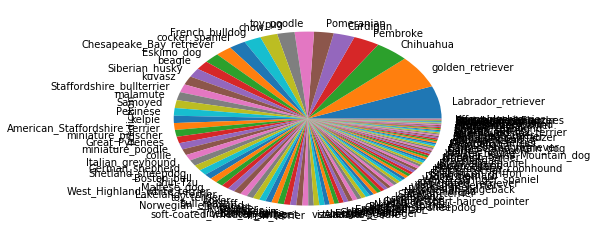

In [63]:
# Visualize the common dog breeds
archive_clean.prediction.value_counts().plot(kind= 'pie')

According to this visualization, The most common dog breeds are:
    Labrador retriever, golden retriever, Chihuaha and Pembroke.

In [64]:
archive_clean.favorite_count.sort_values(ascending= False, inplace=False)

2365    74935.0
2363    74935.0
2472    55794.0
2473    55794.0
2474    55794.0
1213    54640.0
1214    54640.0
1215    54640.0
939     42182.0
938     42182.0
937     42182.0
177     39367.0
176     39367.0
178     39367.0
1011    36295.0
1010    36295.0
1012    36295.0
1221    34152.0
331     31868.0
332     31868.0
333     31868.0
4347    30277.0
4348    30277.0
4526    29305.0
410     27688.0
1029    26582.0
1031    26582.0
1030    26582.0
287     23841.0
286     23841.0
         ...   
5953       31.0
5952       31.0
5954       31.0
5929       18.0
5930       18.0
5928       18.0
5988       11.0
5989       11.0
5990       11.0
260         NaN
261         NaN
262         NaN
584         NaN
585         NaN
586         NaN
674         NaN
675         NaN
676         NaN
818         NaN
819         NaN
820         NaN
1653        NaN
1654        NaN
1655        NaN
2095        NaN
2096        NaN
2097        NaN
4234        NaN
4235        NaN
4236        NaN
Name: favorite_count, Le

#### Insight 2:

In [65]:
# get the breeds types for highest favorite_count
first_favorite = archive_clean[archive_clean.favorite_count == 74935.0]
second_favorite = archive_clean[archive_clean.favorite_count == 55794.0]
third_favorite = archive_clean[archive_clean.favorite_count == 54640.0]
fourth_favorite = archive_clean[archive_clean.favorite_count == 42182.0]
fifth_favorite = archive_clean[archive_clean.favorite_count == 39367.0]
fifth_favorite

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count,jpg_url,img_num,dog_prediction,prediction,confident,dog_breed
176,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,,96591.0,39367.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,1.0,English_springer,0.383404,True
177,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,,96591.0,39367.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,2.0,Boston_bull,0.134967,True
178,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,,96591.0,39367.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,3.0,Cardigan,0.110481,True


Text(0.5,1,'the predicted breeds for the highest favorite_count')

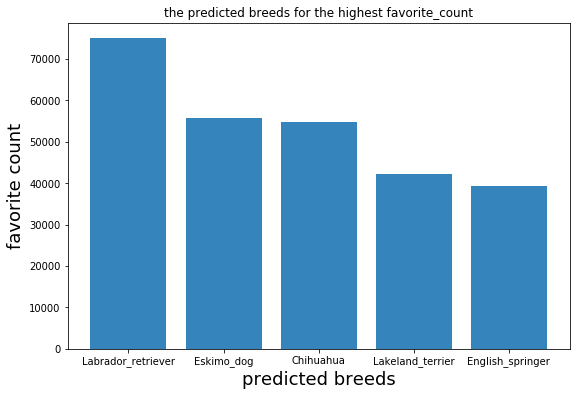

In [66]:
# visualize of the predicted breeds for the highest favorite_count
names=[1,2,3,4,5]
most_favorite_count = [74935, 55794, 54640, 42182, 39367]
most_favorite_breeds = ['Labrador_retriever', 'Eskimo_dog', 'Chihuahua', 'Lakeland_terrier', 'English_springer']
plt.figure(figsize=(9,6))
plt.bar(names, most_favorite_count, tick_label= most_favorite_breeds, alpha=.9)
plt.xlabel('predicted breeds', fontsize=18)
plt.ylabel('favorite count', fontsize=18)
plt.title('the predicted breeds for the highest favorite_count')
